### 데이터 구조 훑어보기

In [15]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [16]:
file_path = '../data/buoy/data_KS.csv'

In [17]:
buoy = pd.read_csv(file_path)

In [18]:
buoy.head()

,date_time,cur_vel,cur_dir_deg,water_temp,salty,sig_wave_h,sig_wave_p,max_wave_h,max_wave_p,wave_dir_deg,wind_vel,wind_dir_deg,air_temp,air_pres
0,2012-11-16 16:00,0.497,49,15.3,33.09,1.47,5.4,2.30,4.5,188,3.4,8,15.4,1020.6
1,2012-11-16 16:30,0.240,29,15.5,33.05,1.48,5.5,2.22,9.0,45,1.7,120,14.5,1020.4
2,2012-11-16 17:00,0.232,11,15.5,33.03,1.43,6.1,2.59,5.0,36,1.2,56,14.6,1020.1
3,2012-11-16 17:30,0.152,25,15.5,33.04,1.43,6.8,2.40,10.0,39,1.2,49,14.8,1019.9
4,2012-11-16 18:00,0.158,37,15.5,33.06,1.39,6.4,2.34,8.0,51,2.4,5,15.5,1019.6


In [19]:
buoy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98877 entries, 0 to 98876
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     98877 non-null  object 
 1   cur_vel       98877 non-null  float64
 2   cur_dir_deg   98877 non-null  int64  
 3   water_temp    98877 non-null  float64
 4   salty         98877 non-null  float64
 5   sig_wave_h    98877 non-null  float64
 6   sig_wave_p    98877 non-null  float64
 7   max_wave_h    98877 non-null  float64
 8   max_wave_p    98877 non-null  float64
 9   wave_dir_deg  98877 non-null  int64  
 10  wind_vel      98877 non-null  float64
 11  wind_dir_deg  98877 non-null  int64  
 12  air_temp      98877 non-null  float64
 13  air_pres      98877 non-null  float64
dtypes: float64(10), int64(3), object(1)
memory usage: 10.6+ MB


In [20]:
buoy['sig_wave_h'].value_counts()

0.64    958
0.67    945
0.65    922
0.70    918
0.63    917
       ... 
4.87      1
6.03      1
5.38      1
6.23      1
4.20      1
Name: sig_wave_h, Length: 631, dtype: int64

In [21]:
buoy.describe()

,cur_vel,cur_dir_deg,water_temp,salty,sig_wave_h,sig_wave_p,max_wave_h,max_wave_p,wave_dir_deg,wind_vel,wind_dir_deg,air_temp,air_pres
count,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000,98877.000000
mean,0.378613,126.702479,19.110618,29.240471,1.044887,5.775506,1.707806,5.985290,109.248460,6.754092,161.357980,14.077533,1015.490019
std,0.375975,105.259737,4.419357,6.041775,0.687898,1.586134,1.123879,1.932963,80.931786,4.040712,87.383543,13.340583,7.536860
min,0.000000,0.000000,8.200000,0.010000,0.010000,2.500000,0.020000,1.000000,0.000000,0.100000,0.000000,-69.200000,960.300000
25%,0.124000,47.000000,15.300000,26.800000,0.590000,4.600000,0.970000,4.500000,46.000000,4.000000,83.000000,9.900000,1009.800000
50%,0.269000,76.000000,18.500000,30.590000,0.880000,5.500000,1.440000,5.500000,60.000000,6.200000,154.000000,16.200000,1015.300000
75%,0.500000,218.000000,22.600000,33.030000,1.300000,6.600000,2.120000,7.000000,199.000000,8.800000,232.000000,21.300000,1021.400000
max,8.759000,359.000000,31.900000,63.120000,12.970000,15.600000,29.950000,20.000000,359.000000,48.400000,359.000000,57.700000,1035.500000


array([[<AxesSubplot:title={'center':'cur_vel'}>,
        <AxesSubplot:title={'center':'cur_dir_deg'}>,
        <AxesSubplot:title={'center':'water_temp'}>,
        <AxesSubplot:title={'center':'salty'}>],
       [<AxesSubplot:title={'center':'sig_wave_h'}>,
        <AxesSubplot:title={'center':'sig_wave_p'}>,
        <AxesSubplot:title={'center':'max_wave_h'}>,
        <AxesSubplot:title={'center':'max_wave_p'}>],
       [<AxesSubplot:title={'center':'wave_dir_deg'}>,
        <AxesSubplot:title={'center':'wind_vel'}>,
        <AxesSubplot:title={'center':'wind_dir_deg'}>,
        <AxesSubplot:title={'center':'air_temp'}>],
       [<AxesSubplot:title={'center':'air_pres'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

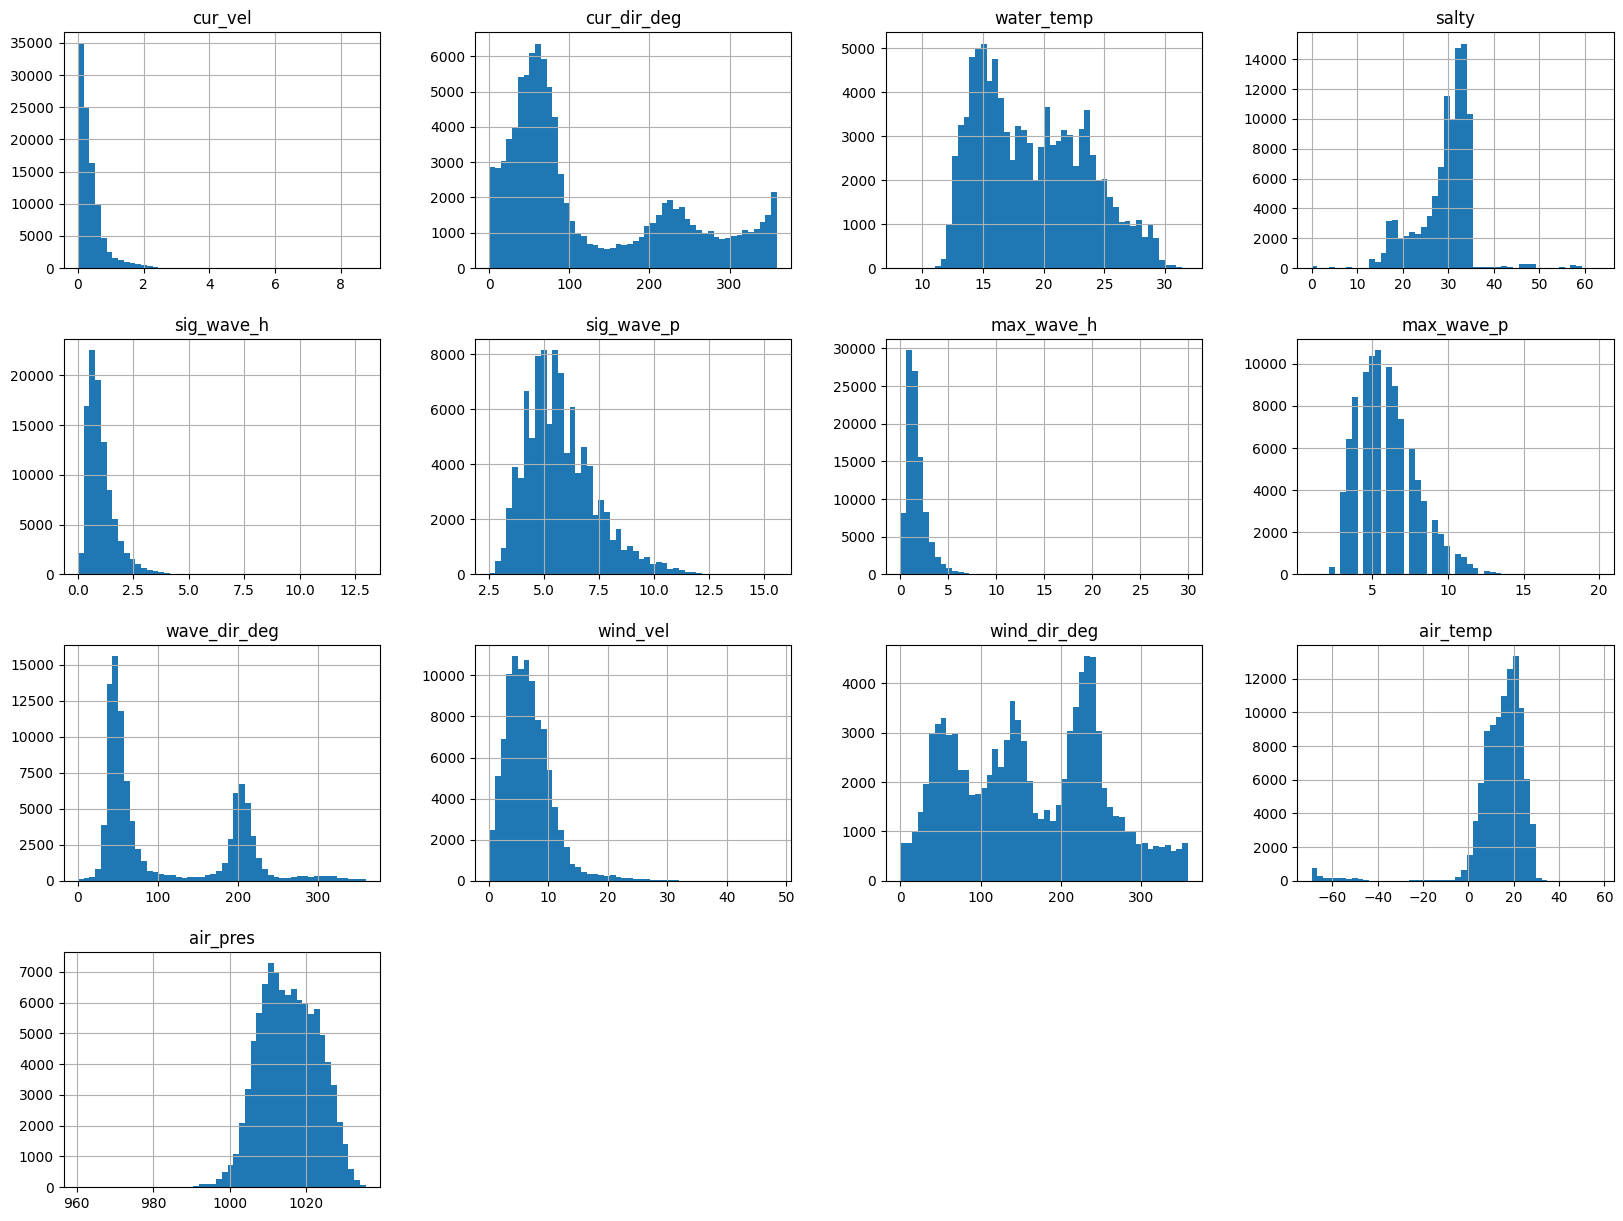

In [56]:
buoy.hist(bins=50, figsize=(20, 15))

### 테스트 세트 만들기

#### Holdout, split

In [39]:
train_size = round(buoy.shape[0]*0.8)
print(train_size)

79102


In [40]:
train_set = buoy[:train_size]
test_set = buoy[train_size:]

In [46]:
print(train_set.shape)
print(test_set.shape)

(79102, 14)
(19775, 14)


#### Holdout, random

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_set_rand, test_set_rand = train_test_split(buoy, test_size=0.2, random_state=42)

In [49]:
print(train_set_rand.shape)
print(test_set_rand.shape)

(79101, 14)
(19776, 14)


### 데이터 시각화

<AxesSubplot:xlabel='wind_vel', ylabel='sig_wave_h'>

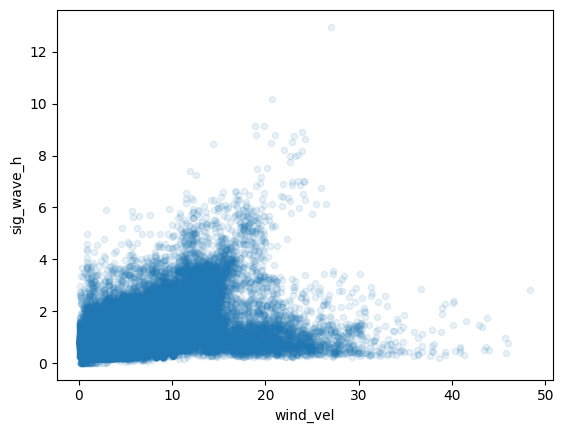

In [60]:
buoy.plot(kind="scatter", x="wind_vel", y="sig_wave_h", alpha=0.1)

<AxesSubplot:xlabel='wind_vel', ylabel='sig_wave_h'>

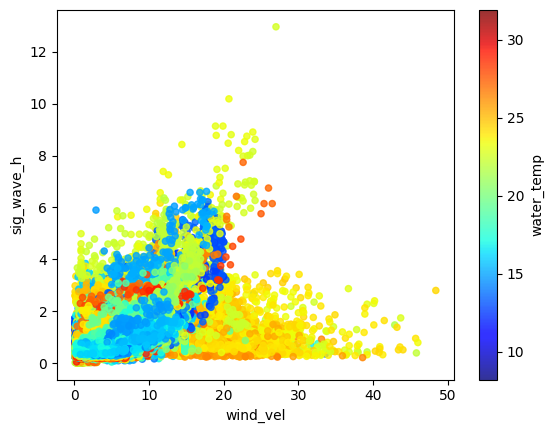

In [77]:
buoy.plot(kind="scatter", x="wind_vel", y="sig_wave_h", alpha=0.8, c="water_temp", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

### 상관관계 조사

In [78]:
corr_matrix = buoy.corr()

In [79]:
corr_matrix

,cur_vel,cur_dir_deg,water_temp,salty,sig_wave_h,sig_wave_p,max_wave_h,max_wave_p,wave_dir_deg,wind_vel,wind_dir_deg,air_temp,air_pres
cur_vel,1.000000,-0.068115,0.223114,-0.153288,-0.047229,-0.003567,-0.047774,-0.003511,0.036065,0.131649,-0.042218,-0.194168,-0.055292
cur_dir_deg,-0.068115,1.000000,0.004542,-0.142927,0.109805,0.019982,0.106016,0.010898,-0.052862,0.191820,0.123358,-0.173988,-0.053530
water_temp,0.223114,0.004542,1.000000,-0.275460,-0.016569,-0.016977,-0.016711,-0.035434,0.023915,0.128116,0.115412,0.282141,-0.496432
salty,-0.153288,-0.142927,-0.275460,1.000000,0.019326,0.015160,0.019139,0.017668,-0.053483,-0.227464,0.003093,0.138884,0.202583
sig_wave_h,-0.047229,0.109805,-0.016569,0.019326,1.000000,0.582813,0.967169,0.471182,-0.176136,0.455224,0.122495,-0.062337,-0.036608
sig_wave_p,-0.003567,0.019982,-0.016977,0.015160,0.582813,1.000000,0.552275,0.871878,-0.304024,0.021509,0.096346,-0.094443,0.115710
max_wave_h,-0.047774,0.106016,-0.016711,0.019139,0.967169,0.552275,1.000000,0.445748,-0.167501,0.446637,0.119185,-0.060318,-0.036616
max_wave_p,-0.003511,0.010898,-0.035434,0.017668,0.471182,0.871878,0.445748,1.000000,-0.273581,0.021577,0.065124,-0.099300,0.126063
wave_dir_deg,0.036065,-0.052862,0.023915,-0.053483,-0.176136,-0.304024,-0.167501,-0.273581,1.000000,0.006810,-0.240380,0.057086,-0.289733
wind_vel,0.131649,0.191820,0.128116,-0.227464,0.455224,0.021509,0.446637,0.021577,0.006810,1.000000,0.060517,-0.291250,-0.136543


In [80]:
corr_matrix["sig_wave_h"].sort_values(ascending=False)

sig_wave_h      1.000000
max_wave_h      0.967169
sig_wave_p      0.582813
max_wave_p      0.471182
wind_vel        0.455224
wind_dir_deg    0.122495
cur_dir_deg     0.109805
salty           0.019326
water_temp     -0.016569
air_pres       -0.036608
cur_vel        -0.047229
air_temp       -0.062337
wave_dir_deg   -0.176136
Name: sig_wave_h, dtype: float64

array([[<AxesSubplot:xlabel='sig_wave_h', ylabel='sig_wave_h'>,
        <AxesSubplot:xlabel='sig_wave_p', ylabel='sig_wave_h'>,
        <AxesSubplot:xlabel='wind_vel', ylabel='sig_wave_h'>,
        <AxesSubplot:xlabel='wind_dir_deg', ylabel='sig_wave_h'>,
        <AxesSubplot:xlabel='cur_dir_deg', ylabel='sig_wave_h'>],
       [<AxesSubplot:xlabel='sig_wave_h', ylabel='sig_wave_p'>,
        <AxesSubplot:xlabel='sig_wave_p', ylabel='sig_wave_p'>,
        <AxesSubplot:xlabel='wind_vel', ylabel='sig_wave_p'>,
        <AxesSubplot:xlabel='wind_dir_deg', ylabel='sig_wave_p'>,
        <AxesSubplot:xlabel='cur_dir_deg', ylabel='sig_wave_p'>],
       [<AxesSubplot:xlabel='sig_wave_h', ylabel='wind_vel'>,
        <AxesSubplot:xlabel='sig_wave_p', ylabel='wind_vel'>,
        <AxesSubplot:xlabel='wind_vel', ylabel='wind_vel'>,
        <AxesSubplot:xlabel='wind_dir_deg', ylabel='wind_vel'>,
        <AxesSubplot:xlabel='cur_dir_deg', ylabel='wind_vel'>],
       [<AxesSubplot:xlabel='sig_wave_h', yl

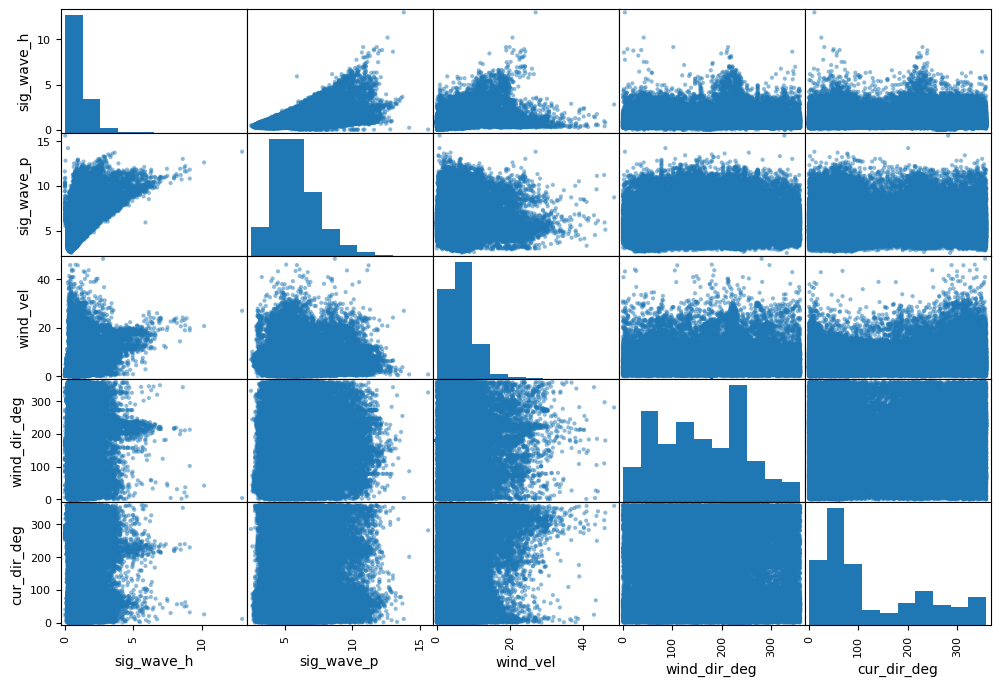

In [81]:
from pandas.plotting import scatter_matrix

attributes = ["sig_wave_h", "sig_wave_p", "wind_vel", "wind_dir_deg", "cur_dir_deg"]
scatter_matrix(buoy[attributes], figsize=(12,8))

### 특성 스케일링

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

In [104]:
sig_wave_h = buoy["sig_wave_h"].to_numpy()
sig_wave_h = np.expand_dims(sig_wave_h, axis=1)

In [116]:
scaler_std = StandardScaler()
scaler_std.fit(sig_wave_h)
sig_wave_h_std_scaled = scaler_std.transform(sig_wave_h)

In [123]:
print("Mean: " + str(np.mean(sig_wave_h_std_scaled)))
print("Std:  " + str(np.std(sig_wave_h_std_scaled)))

print("Min:  " + str(np.min(sig_wave_h_std_scaled)))
print("Max:  " + str(np.max(sig_wave_h_std_scaled)))

Mean: -2.0767908677919937e-16
Std:  0.9999999999999999
Min:  -1.5044264147636708
Max:  17.335669661415363


In [114]:
scaler_mm = MinMaxScaler()
scaler_mm.fit(sig_wave_h)
sig_wave_h_mm_scaled = scaler_mm.transform(sig_wave_h)

In [124]:
print("Mean: " + str(np.mean(sig_wave_h_mm_scaled)))
print("Std:  " + str(np.std(sig_wave_h_mm_scaled)))

print("Min:  " + str(np.min(sig_wave_h_mm_scaled)))
print("Max:  " + str(np.max(sig_wave_h_mm_scaled)))

Mean: 0.07985237488601939
Std:  0.05307828558604732
Min:  0.0
Max:  1.0


### 입.출력 데이터 정리

#### 입력 데이터: wind_vel, wind_dir_sin, wind_dir_cos

In [182]:
wind_vel = buoy["wind_vel"].to_numpy()
wind_vel = np.expand_dims(wind_vel, axis=1)

In [183]:
wind_dir_deg = buoy["wind_dir_deg"].to_numpy()

In [184]:
wind_dir_sin = np.sin(wind_dir_deg/180*np.pi)
wind_dir_sin = np.expand_dims(wind_dir_sin, axis=1)
wind_dir_cos = np.cos(wind_dir_deg/180*np.pi)
wind_dir_cos = np.expand_dims(wind_dir_cos, axis=1)

In [185]:
X = np.concatenate((wind_vel, wind_dir_sin, wind_dir_cos), axis=1)

#### 출력 데이터: sig_wave_h

In [186]:
sig_wave_h = buoy["sig_wave_h"].to_numpy()
sig_wave_h = np.expand_dims(sig_wave_h, axis=1)

In [187]:
y = sig_wave_h

#### 데이터 분할, 훈련:검증:테스트 = 6:2:2

In [188]:
train_size = round(X.shape[0]*0.6)
valid_size = round(X.shape[0]*0.8)

In [189]:
X_train_unscaled = X[:train_size]
X_valid_unscaled = X[train_size:valid_size]
X_test_unscaled = X[valid_size:]

In [190]:
y_train = y[:train_size]
y_valid = y[train_size:valid_size]
y_test = y[valid_size:]

##### 입력 데이터 정규화

In [191]:
scaler_std.fit(X_train_unscaled)
X_train = scaler_std.transform(X_train_unscaled)
X_valid = scaler_std.transform(X_valid_unscaled)
X_test = scaler_std.transform(X_test_unscaled)

In [207]:
for ii in range(3):
    print("train_feature_#{0}_mean: ".format(ii) + f'{np.mean(X_train[:,ii]):0.4f}')
    print("train_feature_#{0}_std: ".format(ii) + f'{np.std(X_train[:,ii]):0.4f}')
    print()

print()
print()
for ii in range(3):
    print("valid_feature_#{0}_mean: ".format(ii) + f'{np.mean(X_valid[:,ii]):0.4f}')
    print("valid_feature_#{0}_std: ".format(ii) + f'{np.std(X_valid[:,ii]):0.4f}')
    print()

print()
print()
for ii in range(3):
    print("test_feature_#{0}_mean: ".format(ii) + f'{np.mean(X_test[:,ii]):0.4f}')
    print("test_feature_#{0}_std: ".format(ii) + f'{np.std(X_test[:,ii]):0.4f}')
    print()

train_feature_#0_mean: 0.0000
train_feature_#0_std: 1.0000

train_feature_#1_mean: -0.0000
train_feature_#1_std: 1.0000

train_feature_#2_mean: -0.0000
train_feature_#2_std: 1.0000



valid_feature_#0_mean: -0.1444
valid_feature_#0_std: 0.7674

valid_feature_#1_mean: -0.0471
valid_feature_#1_std: 1.0413

valid_feature_#2_mean: 0.0861
valid_feature_#2_std: 0.9722



test_feature_#0_mean: -0.1596
test_feature_#0_std: 0.7247

test_feature_#1_mean: -0.0590
test_feature_#1_std: 0.9712

test_feature_#2_mean: -0.2060
test_feature_#2_std: 0.9679



### 모델 생성

In [218]:
batch_num = 256
loss_fn = 'mae'
patience_num = 10
epoch_num = 200
activation_fn = 'relu'
optimizer = 'adam'
layer_num = 2
node_num = 10

In [216]:
cb_early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = patience_num)

In [212]:
from tensorflow import keras

In [213]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(node_num, activation=activation_fn, input_shape=(X_train.shape[1],)))
for ii in range(layer_num-1):
    model.add(keras.layers.Dense(node_num, activation=activation_fn))
model.add(keras.layers.Dense(1))

In [214]:
model.compile(optimizer=optimizer, loss = loss_fn)

### 모델 학습

In [219]:
history = model.fit(X_train, y_train, epochs=epoch_num, batch_size=batch_num, validation_data = (X_valid, y_valid),
                   callbacks=[cb_early_stopping])

2022-03-23 18:46:02.743011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
 56/232 [======>.......................] - ETA: 0s - loss: 1.2988

2022-03-23 18:46:04.256283: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


232/232 [==============================] - 2s 4ms/step - loss: 0.7852 - val_loss: 0.4281
Epoch 2/200
232/232 [==============================] - 1s 3ms/step - loss: 0.4109 - val_loss: 0.4141
Epoch 3/200
232/232 [==============================] - 1s 3ms/step - loss: 0.4025 - val_loss: 0.4002
Epoch 4/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3924 - val_loss: 0.3869
Epoch 5/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3826 - val_loss: 0.3713
Epoch 6/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3753 - val_loss: 0.3564
Epoch 7/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3724 - val_loss: 0.3519
Epoch 8/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3709 - val_loss: 0.3467
Epoch 9/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3700 - val_loss: 0.3489
Epoch 10/200
232/232 [==============================] - 1s 3ms/step - loss: 0.3691 - val_loss: 0.3464
E

In [221]:
history.history['loss']

[0.7851908206939697,
 0.4108884632587433,
 0.40254661440849304,
 0.39235180616378784,
 0.3826216459274292,
 0.3753378689289093,
 0.3724244236946106,
 0.37087127566337585,
 0.3700457811355591,
 0.36909496784210205,
 0.3683031499385834,
 0.3679552972316742,
 0.36730706691741943,
 0.3667807877063751,
 0.3664388358592987,
 0.36597293615341187,
 0.3657218813896179,
 0.36513805389404297,
 0.3653847277164459,
 0.3649466335773468,
 0.36477023363113403,
 0.36455169320106506,
 0.364265114068985,
 0.36417248845100403,
 0.36417970061302185,
 0.36404842138290405,
 0.36399152874946594,
 0.3638114333152771,
 0.36361896991729736,
 0.3636501431465149,
 0.36344438791275024]

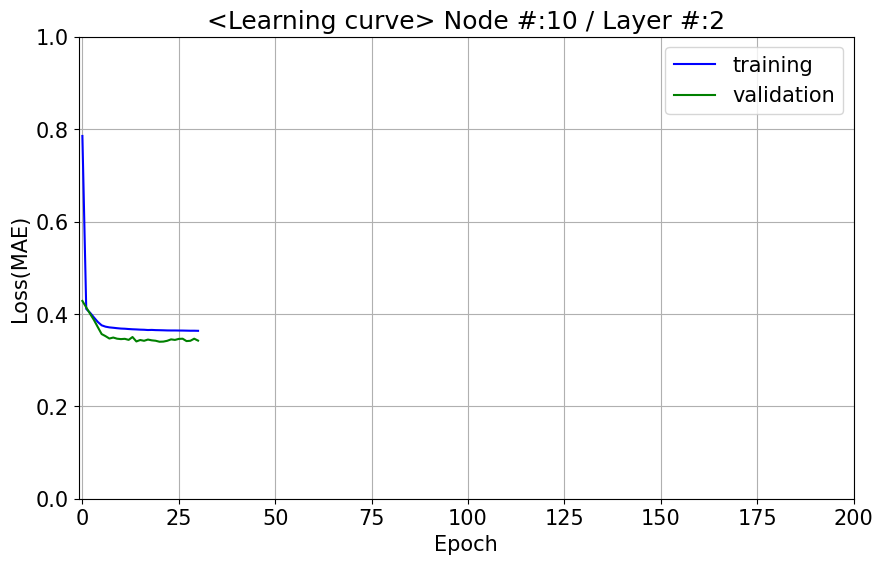

In [233]:
plt.plot(pd.DataFrame(history.history)[['loss']],'b', label='training')
plt.plot(pd.DataFrame(history.history)[['val_loss']],'g', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss(MAE)")  # "Loss(MAE)"  logcosh
plt.rcParams['figure.figsize'] = [10, 6]
font = {'weight' : 'normal',
       'size' : 15}
plt.rc('font', **font)
plt.title('<Learning curve> Node #:' + str(node_num)+' / Layer #:'+str(layer_num))
plt.grid(True)
plt.legend()
plt.xlim(-1, 200)
plt.ylim(0, 1)
plt.show()